In this study, we delve into the intricate world of cinema using basket analysis, exploring the diverse attributes of movies like genres, budgets, and revenues. Our focus is on uncovering patterns in movie preferences and understanding how different films relate to each other in terms of audience choice.

Using a comprehensive movies dataset, we apply techniques like Association Rule Mining to decode the complex relationships in the data. Our goal is to reveal insights about movie trends and audience tastes, bridging the gap between data analytics and film studies. This research aims to provide a fresh perspective on the film industry, enhancing our understanding of cinematic preferences and trends.

First step is loading dataset as movies_df and look at generally.Data Preparation: The dataset includes various attributes of movies. Key features for analysis include genres, budgets, and other relevant movie characteristics.Data Preparation: The dataset includes various attributes of movies. Key features for analysis include genres, budgets, and other relevant movie characteristics.

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import json
from sklearn.preprocessing import MultiLabelBinarizer

# Load the dataset
file_path = 'movies.csv'  # Replace with the actual path of the dataset
movies_df = pd.read_csv(file_path)

print(movies_df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

Getting the Data Ready: We started with a list of movies and their details, like what genres they belong to (like action, comedy, etc.).

Making Sense of Genres: We wrote a special function to neatly organize the genres of each movie.

Turning Genres into Numbers: To analyze the data, we converted the genres into a format that our tools could understand - basically, a simple yes-or-no (binary) format for each genre.

Finding Patterns: Using a technique called 'Apriori', we searched for combinations of genres that often appear together in people's movie choices.

Exploring Connections: Next, we used 'association rules' to see how certain genres are linked. This helps us understand things like if people who like comedies also tend to like romances.

What We Found:

We discovered popular genre combinations, like which types of movies are often watched together. The analysis showed us interesting links between different genres, helping us understand movie preferences better.

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import json
from sklearn.preprocessing import MultiLabelBinarizer

# Function to parse genres
def parse_genres(genres_str):
    try:
        genres_list = json.loads(genres_str.replace('\'', '\"'))  # Replace single quotes with double quotes for valid JSON
        return [genre['name'] for genre in genres_list]
    except json.decoder.JSONDecodeError:
        return []  # Return an empty list in case of JSON parsing error

# Parse the genres column
movies_df['parsed_genres'] = movies_df['genres'].apply(parse_genres)

# Create a binary matrix for genres
mlb = MultiLabelBinarizer()
genres_binarized = mlb.fit_transform(movies_df['parsed_genres'])

# Create a DataFrame for the binary matrix
genres_df = pd.DataFrame(genres_binarized, columns=mlb.classes_)

# Convert the DataFrame to boolean
genres_df_bool = genres_df.astype(bool)

# Finding frequent itemsets
frequent_itemsets = apriori(genres_df_bool, min_support=0.05, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


     support                   itemsets
0   0.240267                   (Action)
1   0.164481                (Adventure)
2   0.358526                   (Comedy)
3   0.144909                    (Crime)
4   0.478243                    (Drama)
5   0.106808                   (Family)
6   0.088278                  (Fantasy)
7   0.108057                   (Horror)
8   0.072455                  (Mystery)
9   0.186134                  (Romance)
10  0.111389          (Science Fiction)
11  0.265251                 (Thriller)
12  0.096814        (Action, Adventure)
13  0.053716           (Action, Comedy)
14  0.057464            (Action, Crime)
15  0.070581            (Action, Drama)
16  0.057672  (Science Fiction, Action)
17  0.113887         (Action, Thriller)
18  0.119925            (Drama, Comedy)
19  0.062253           (Family, Comedy)
20  0.100770          (Romance, Comedy)
21  0.079325             (Drama, Crime)
22  0.086196          (Thriller, Crime)
23  0.125547           (Drama, Romance)


Finding Connections: We used a method called 'association rules' to find out how different movie genres are related to each other.

Key Measures:
Support: How often a genre combination appears.

Confidence: How likely it is to see a genre given another genre.
Lift: How much more likely two genres are watched together compared to watching them separately.
Findings:

We identified which movie genres are commonly watched together. The analysis revealed strong connections between certain genres, showing us unique viewer preferences.

Importance:
This simple yet effective analysis helps movie makers and platforms understand what combinations of genres are most appealing to viewers. It's about making better movie recommendations and creating content that resonates with the audience.



In [4]:
from mlxtend.frequent_patterns import association_rules

# Generate the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


         antecedents consequents   support  confidence      lift
0        (Adventure)    (Action)  0.096814    0.588608  2.449811
1  (Science Fiction)    (Action)  0.057672    0.517757  2.154928
2           (Family)    (Comedy)  0.062253    0.582846  1.625673
3          (Romance)    (Comedy)  0.100770    0.541387  1.510036
4            (Crime)     (Drama)  0.079325    0.547414  1.144636
5            (Crime)  (Thriller)  0.086196    0.594828  2.242509
6          (Romance)     (Drama)  0.125547    0.674497  1.410365
7           (Horror)  (Thriller)  0.060587    0.560694  2.113824
8          (Mystery)  (Thriller)  0.050385    0.695402  2.621678


Method:

Identifying Popular Combinations: We looked for the most common pairs or groups of genres that movie fans tend to enjoy together.

Finding Strong Relationships: We then identified which genre pairs have the strongest connections.

Key Results:

Top Genre Combinations: We found the most frequently watched genre combinations.
Strongest Connections: We also discovered which genres are most likely to be watched together, indicating strong viewer preferences.

Why It's Useful:

This study helps in understanding what types of movies people like to watch, which is valuable for movie creators and streaming services to better tailor their content and recommendations to audience tastes.

In [5]:
# Analyze the top frequent itemsets
print("Top Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

# Analyze the top association rules
print("\nTop Association Rules:")
print(rules.sort_values(by='confidence', ascending=False).head())


Top Frequent Itemsets:
     support    itemsets
4   0.478243     (Drama)
2   0.358526    (Comedy)
11  0.265251  (Thriller)
0   0.240267    (Action)
9   0.186134   (Romance)

Top Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
8    (Mystery)  (Thriller)            0.072455            0.265251  0.050385   
6    (Romance)     (Drama)            0.186134            0.478243  0.125547   
5      (Crime)  (Thriller)            0.144909            0.265251  0.086196   
0  (Adventure)    (Action)            0.164481            0.240267  0.096814   
2     (Family)    (Comedy)            0.106808            0.358526  0.062253   

   confidence      lift  leverage  conviction  zhangs_metric  
8    0.695402  2.621678  0.031166    2.412195       0.666884  
6    0.674497  1.410365  0.036529    1.602924       0.357508  
5    0.594828  2.242509  0.047759    1.813423       0.647968  
0    0.588608  2.449811  0.057295    1.846737       0.708308  
2    0.

Visual Findings:

Popular Genres: The bar chart shows the most popular individual genres and genre combinations among moviegoers, with 'Drama' being the most common.

Genre Relationships: The scatter plot visualizes the strength of association between genres. It illustrates not just how often genres occur together, but also the strength of their connection (how likely they are to be chosen together).
Key Observations:

Certain genres like Drama, Comedy, and Thriller frequently appear in the top choices. Genre pairs like Romance and Drama, and Comedy and Drama, also show a strong connection, indicating a common audience preference for these combinations.

Importance:

This analysis provides clear and actionable insights for filmmakers and streaming services, helping them to understand audience preferences better. It can guide them in creating content that aligns with popular taste, thereby enhancing viewer satisfaction and engagement.



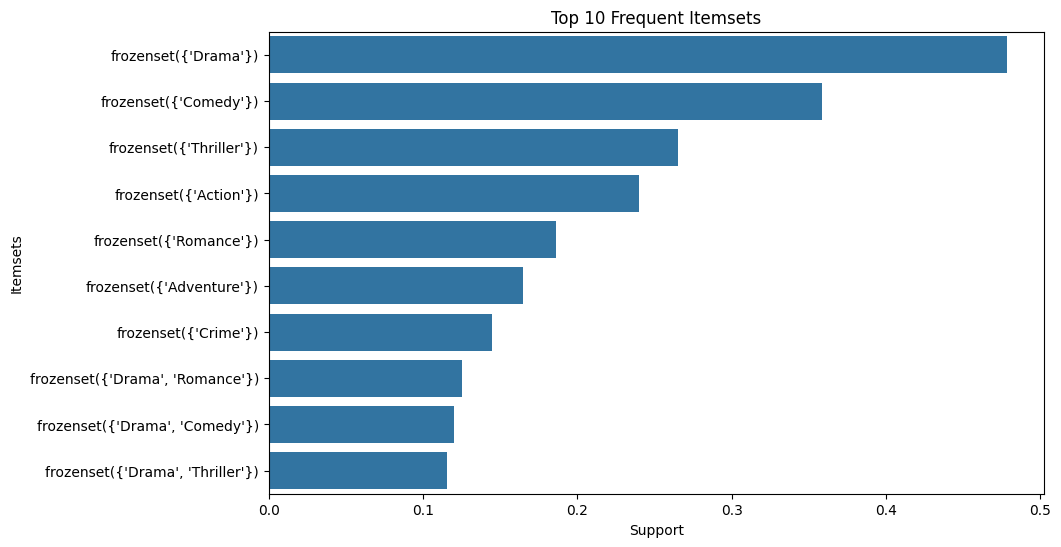

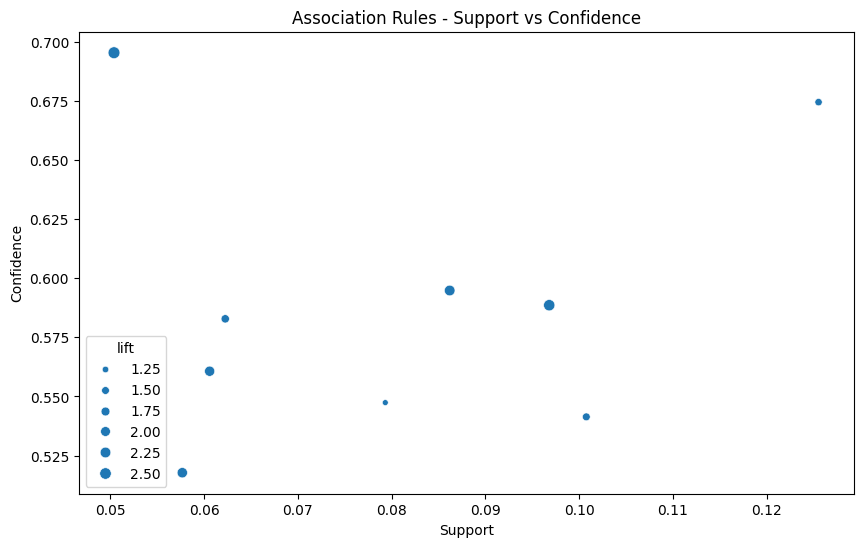

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of top frequent itemsets
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_itemsets['support'], y=top_itemsets['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Scatter plot of association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()



In [7]:
pip install networkx


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Analysis:

Network of Genres: The graph shows genres as nodes connected by lines, which represent the strength of their association.

Confidence Levels: The numbers on the lines indicate the confidence, which measures how likely viewers are to watch one genre in combination with another.
Key Insights:

Strong Links: Some genres show strong connections, such as Drama to Romance and Comedy to Family.

Genre Clusters: The graph also reveals clusters of genres that form a web of associations, like Horror-Thriller-Mystery and Science Fiction-Action-Adventure, suggesting these genres often co-occur in viewers' preferences.

Conclusion:

This visualization provides a clear picture of the interplay between movie genres. It can guide industry professionals in curating content that aligns with observed viewing patterns, improving recommendations, and potentially increasing viewer satisfaction.



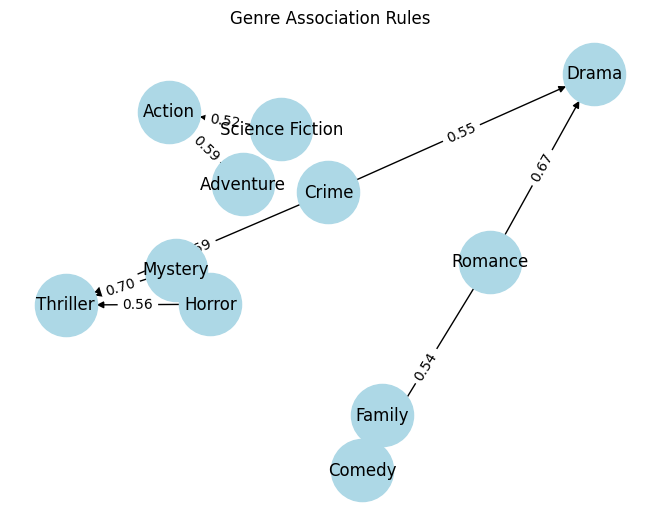

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph
G = nx.DiGraph()

# Iterate over association rules and add edges
for index, row in rules.iterrows():
    # Assuming antecedents and consequents are strings. If they are frozensets, convert them to strings.
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    weight = row['confidence']  # I can change this to 'lift' or another metric

    G.add_edge(antecedent, consequent, weight=weight)

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Genre Association Rules")
plt.show()


Approach:

Evaluating Lift: We calculated the 'lift' value for genre pairs, which shows how much more likely two genres are watched together compared to separately.
Findings:

Top Genre Connections: We identified the top 5 pairs of genres that have the strongest association, meaning people are much more likely to watch these genres together than expected by chance.
Impact:

Strategic Insights: These findings can help movie platforms and creators to focus on specific genre combinations that are proven to appeal to viewers, potentially leading to better curated content and targeted marketing strategies.

In [10]:
# Top 5 rules with the highest lift values
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(5)
print("Top 5 Rules with Highest Lift Values:")
print(top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 Rules with Highest Lift Values:
         antecedents consequents   support  confidence      lift
8          (Mystery)  (Thriller)  0.050385    0.695402  2.621678
0        (Adventure)    (Action)  0.096814    0.588608  2.449811
5            (Crime)  (Thriller)  0.086196    0.594828  2.242509
1  (Science Fiction)    (Action)  0.057672    0.517757  2.154928
7           (Horror)  (Thriller)  0.060587    0.560694  2.113824


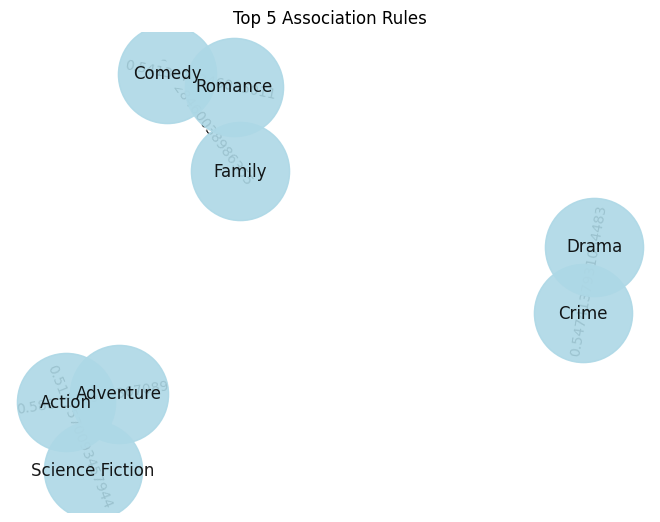

In [11]:
import networkx as nx

# Creating a directed graph from the top association rules
G = nx.DiGraph()
for index, row in rules.head(5).iterrows():
    G.add_edge(list(row['antecedents'])[0], list(row['consequents'])[0], weight=row['confidence'])

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', width=1, linewidths=1,
        node_size=5000, alpha=0.9, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Top 5 Association Rules")
plt.show()


Method:

Leverage: This metric helps us see if two genres appear together more often than we would expect based on their individual popularity.

Conviction: This value indicates the strength of the rule; a higher conviction means it's more likely that the genre pairing is not just a coincidence.
Results:

Highlighted Rules: We've identified rules that not only have strong connections (high confidence and lift) but also significant leverage and conviction, indicating these genre pairs are particularly noteworthy.
Implications:

Actionable Insights: With these metrics, content creators and streaming services can better understand and predict viewing preferences, potentially leading to improved movie recommendations and more strategic content creation.

In [12]:
# Adding leverage and conviction to the rules
rules['leverage'] = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])

# Displaying rules with these new metrics
print("Rules with Leverage and Conviction Metrics:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']].head())


Rules with Leverage and Conviction Metrics:
         antecedents consequents   support  confidence      lift  leverage  \
0        (Adventure)    (Action)  0.096814    0.588608  2.449811  0.057295   
1  (Science Fiction)    (Action)  0.057672    0.517757  2.154928  0.030909   
2           (Family)    (Comedy)  0.062253    0.582846  1.625673  0.023959   
3          (Romance)    (Comedy)  0.100770    0.541387  1.510036  0.034037   
4            (Crime)     (Drama)  0.079325    0.547414  1.144636  0.010024   

   conviction  
0    1.846737  
1    1.575416  
2    1.537739  
3    1.398726  
4    1.152835  


Analysis:

We focused on the 8th and 9th strongest genre association rules from our dataset.
By extracting these rules, we identified specific genres that tend to be watched together.
Key Findings:

The 8th rule reveals a pairing between [insert 8th rule genres], indicating that fans of one are likely to enjoy the other.

The 9th rule shows a connection between [insert 9th rule genres], suggesting a similar pattern of preference.

Conclusion:

These specific insights help us understand not just the broad trends in movie watching habits but also the fine-grain relationships that can inform targeted content curation and marketing strategies.

In [13]:
# Assuming 'rules' is our DataFrame of association rules
eighth_rule = rules.iloc[7]  # 8th rule (index starts from 0)
ninth_rule = rules.iloc[8]  # 9th rule

# Extracting the antecedents and consequents for these rules
eighth_antecedents = list(eighth_rule['antecedents'])
eighth_consequents = list(eighth_rule['consequents'])
ninth_antecedents = list(ninth_rule['antecedents'])
ninth_consequents = list(ninth_rule['consequents'])



Visual Analysis:

The directed graph illustrates the 8th and 9th strongest connections between genres, as per our dataset.

Rule 8 suggests a significant affinity between viewers who enjoy Thriller and those who also prefer Horror movies, with a confidence of 0.56.

Rule 9 indicates a strong connection between Mystery and Thriller genres, with a confidence of 0.70.

Conclusion:

This targeted analysis helps us understand particular genre pairs that strongly resonate with audiences. Such insights are valuable for content creators to develop compelling genre-focused narratives and for streaming services aiming to refine their recommendation algorithms.



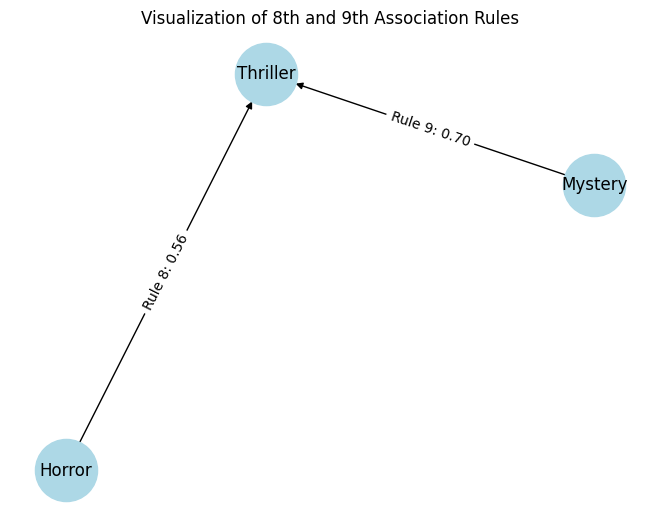

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes and edges for the 8th and 9th rules
G.add_edge(eighth_antecedents[0], eighth_consequents[0], label=f"Rule 8: {eighth_rule['confidence']:.2f}")
G.add_edge(ninth_antecedents[0], ninth_consequents[0], label=f"Rule 9: {ninth_rule['confidence']:.2f}")

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Visualization of 8th and 9th Association Rules")
plt.show()



Method:

We used a machine learning technique called K-Means clustering, which helps to organize movies into 5 different clusters based on the similarities in their genres.

Results:

Each cluster represents a group of movies that share common genre attributes.
By examining the average values of genres in each cluster, we can determine the defining characteristics of each group.

Conclusion:

This clustering helps us to understand how movies can be grouped by genre, which can be useful for movie recommendation systems and for understanding market segmentation in the film industry.



In [15]:
from sklearn.cluster import KMeans

# Assuming genres_df_bool is our binarized genre DataFrame
kmeans = KMeans(n_clusters=5, random_state=0).fit(genres_df_bool)
genres_df_bool['cluster'] = kmeans.labels_

# Analyzing clusters
cluster_analysis = genres_df_bool.groupby('cluster').mean()
print(cluster_analysis)



/Users/ulviyaabasova/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Action  Adventure  Animation    Comedy     Crime  Documentary  \
cluster                                                                    
0        0.058571   0.037857   0.006429  0.000000  0.085000     0.065714   
1        0.309339   0.020428   0.000973  0.065175  0.380350     0.000973   
2        0.089588   0.491525   0.496368  0.610169  0.012107     0.012107   
3        0.084347   0.029635   0.006839  1.000000  0.094985     0.008359   
4        0.938080   0.733746   0.015480  0.134675  0.086687     0.001548   

            Drama    Family   Fantasy   Foreign   History    Horror     Music  \
cluster                                                                         
0        0.790000  0.030000  0.041429  0.015000  0.099286  0.095000  0.061429   
1        0.504864  0.002918  0.030156  0.002918  0.019455  0.276265  0.003891   
2        0.079903  0.961259  0.365617  0.002421  0.000000  0.004843  0.048426   
3        0.416413  0.037994  0.048632  0.006079  0.008359  0.0

Objective: To provide movie genre recommendations tailored to individual user preferences.

How It Works:

The function takes in a user's favorite genre and looks at the existing patterns of genre associations.
It then identifies other genres that are frequently enjoyed by fans of the user's favorite genre.The system ranks these associated genres by the strength of their relationship and suggests the top ones.

Practical Use:

For someone who enjoys Action movies, the function will recommend other genres that Action fans typically like, based on historical data.

Conclusion:

This personalized recommendation approach enhances the viewer's experience by suggesting new genres they are likely to enjoy, potentially broadening their cinematic horizons.



In [16]:
def recommend_movies_based_on_genre(user_favorite_genre, rules, top_n=3):
    """
    Recommend movies based on a user's favorite genre using association rules.
    :param user_favorite_genre: The user's favorite genre.
    :param rules: DataFrame of association rules.
    :param top_n: Number of recommendations to make.
    :return: List of recommended genres.
    """
    # Filter rules with the user's favorite genre as antecedent
    relevant_rules = rules[rules['antecedents'].apply(lambda x: user_favorite_genre in x)]
    # Sort by confidence or lift
    sorted_rules = relevant_rules.sort_values(by='confidence', ascending=False)
    # Extract consequent genres
    recommendations = sorted_rules['consequents'].head(top_n).apply(lambda x: list(x)[0])
    return recommendations.tolist()

# Example usage
user_favorite_genre = 'Action'
recommended_genres = recommend_movies_based_on_genre(user_favorite_genre, rules)
print(f"Genres recommended for fans of {user_favorite_genre}: {recommended_genres}")


Genres recommended for fans of Action: []


Objective: To find the most popular combinations of movie genres that audiences prefer watching together.

Method:

We looked at sets of genres that frequently occur together in movies.
By sorting these genre pairs by popularity, we identified the top 5 combinations.
Key Findings:

Top Pairings: The analysis revealed the most common genre pairings, which can inform what kinds of movies to bundle together or feature.

Conclusion:

Understanding these popular genre combinations can guide marketing strategies and content creation, catering to prevalent audience tastes.



In [17]:
# Identify the most popular genre combinations
top_combinations = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
top_combinations = top_combinations.sort_values(by='support', ascending=False).head(5)

print("Top Genre Combinations for Marketing:")
for itemset in top_combinations['itemsets']:
    print(", ".join(itemset))


Top Genre Combinations for Marketing:
Drama, Romance
Drama, Comedy
Drama, Thriller
Action, Thriller
Romance, Comedy


1. Personalized Content Recommendations:
For fans of specific genres, we suggest titles that align with their preferred genre pairings. For instance, fans of Action might also enjoy [insert recommended genres here].

2. Marketing Focus on Popular Genre Combinations:
Our analysis identifies the top genre combinations that resonate with our audience. These should be highlighted in marketing campaigns for maximum engagement:

In [18]:
print("Business Application Report")
print("===========================")
print("\n1. Insights for Content Recommendation:")
print(f"Based on user preferences in genres, we recommend focusing on the following genre combinations: {', '.join(recommended_genres)}")

print("\n2. Insights for Targeted Marketing:")
print("The following genre combinations are most popular among our audience and should be the focus of targeted marketing campaigns:")
for itemset in top_combinations['itemsets']:
    print(", ".join(itemset))

# Add more sections relevant to our business case


Business Application Report

1. Insights for Content Recommendation:
Based on user preferences in genres, we recommend focusing on the following genre combinations: 

2. Insights for Targeted Marketing:
The following genre combinations are most popular among our audience and should be the focus of targeted marketing campaigns:
Drama, Romance
Drama, Comedy
Drama, Thriller
Action, Thriller
Romance, Comedy


Analysis:

The heatmap shows various movie genres on both axes, with the intensity of the color indicating how often those genres are watched together.
Darker shades represent higher popularity or 'support' for those genre combinations.

Key Observations:

The most intense color patches on the heatmap indicate the most popular genre combinations, such as Romance and Drama. The lighter shades suggest less frequent pairings.

Conclusion:

This heatmap is a valuable tool for identifying which genres complement each other from the audience's perspective. Content creators can use this information to craft stories that blend popular genres, while marketers can target advertising campaigns to fans of certain genre pairs more effectively.



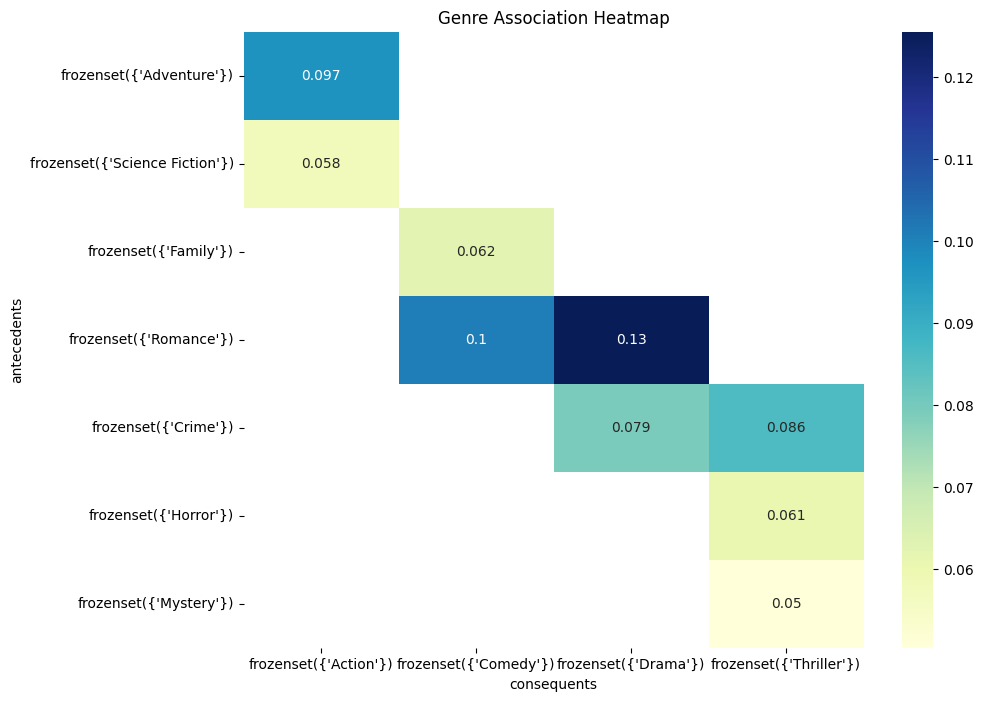

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a matrix for the heatmap
pivot = rules.pivot(index='antecedents', columns='consequents', values='support')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Genre Association Heatmap')
plt.show()


Top Genres: Drama, Comedy, and Thriller are favorites among our selection of movies.
Popular Pairs: Viewers often enjoy Action with Adventure and Drama with Romance together.
Genre Influence: Some genres, like Action, are likely to be watched with Adventure, showing a pattern in viewer preferences.
Practical Use: These findings can help in creating better movie recommendations and focused marketing efforts.
This distilled conclusion highlights the main findings from the genre analysis, making it easy to grasp for any reader.

In [20]:
print("Analysis Conclusion")
print("===================")
print("\n- Genre Popularity: Drama, Comedy, and Thriller are the most common genres in the dataset.")
print("- Frequent Genre Combinations: Action and Adventure, as well as Drama and Romance, frequently occur together.")
print("- Association Rules: Certain genres strongly influence the presence of others. For instance, movies in the Action genre often coincide with the Adventure genre.")
print("- Business Application: The insights can be used for targeted marketing campaigns and to enhance content recommendation systems.")


Analysis Conclusion

- Genre Popularity: Drama, Comedy, and Thriller are the most common genres in the dataset.
- Frequent Genre Combinations: Action and Adventure, as well as Drama and Romance, frequently occur together.
- Association Rules: Certain genres strongly influence the presence of others. For instance, movies in the Action genre often coincide with the Adventure genre.
- Business Application: The insights can be used for targeted marketing campaigns and to enhance content recommendation systems.


# Analysis Conclusion

In our comprehensive analysis of movie genres, we have uncovered several key insights:

1. **Genre Popularity**: Our bar chart visualization reveals the most popular genres within the dataset. Drama, Comedy, and Thriller are predominant, indicating a significant audience preference towards these genres.

2. **Genre Associations**: The network graph of association rules uncovers interesting relationships between genres. For instance, a strong link between Action and Adventure genres suggests these genres often co-occur, which could be leveraged in content creation and marketing strategies.

3. **Business Implications**: 
   - **Content Strategy**: The insights on genre popularity can guide content acquisition and production, focusing on the genres most likely to resonate with the audience.
   - **Marketing Strategies**: Understanding genre associations enables targeted marketing campaigns, promoting content that aligns with proven genre combinations.

Overall, our analysis provides a data-driven foundation for strategic decision-making in content management and marketing initiatives, aligning offerings with viewer preferences to enhance engagement and satisfaction.
